# Assignment 1

In [ ]:
import pandas as pd
import re

## Read data

`ig5000.csv`是一份包含5000篇ig真實貼文的資料集，label=0指日常文，label=1指廣告。

In [ ]:
ig = pd.read_csv('ig5000.csv').dropna()
ig

,text,label
0,V領設計能夠修飾臉型😍\n減齡泡泡袖洋裝😉\n👉https://lihi1.com/JDym...,1
1,【20210303】\n能勇敢追夢的人\n身上都閃著和煦的光芒\n也是好生羨慕！\n-\n敬...,0
2,玉 耳環\n#耳環 #玉 #earrings,1
3,【美國瘋潮WWE Taiwan】\n不管是WWE Elite還是AEW Unrivaled系...,1
4,🌈\n尋晚的post 一po已經被秒殺好多件的Vintage sports windbrea...,1
...,...,...
4995,🌈長桿34cm綠瑪瑙煙嘴煙斗\n復古長桿煙斗\塞入菸草即可使用\n162028\001390,1
4996,抗敏之選*Eunice 藍甘菊舒緩潔面乳~1000ml \n\n★好多美容院都用佢★\n\n...,1
4997,今天特地比較慢出門\n但還是太早到學校了🤦🏼‍♀️\n可能下雨關係車好多今天,1
4998,大量韓國新貨上架🌸\n歡迎到門市選購\n-\n🟥🔺🔶🟧🔸🟡🟨🟩🟢🔹🔷🟦🟣🟪\n———————...,1


## Clean and tokenize text

In [ ]:
! pip3 install -U ckip-transformers
from ckip_transformers.nlp import CkipWordSegmenter

In [ ]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^\u4E00-\u9FD5]"

def clean(texts, clean_re):
    output = []
    for text in texts:
        text = re.sub(clean_re, '', text)
        output.append(text)
    return output

In [ ]:
def tokenize(texts, driver, batch_size, max_length):
    output=[]
    ws  = driver(texts, use_delim=False, 
                batch_size = batch_size,
                 max_length = max_length
                    )
    output = [" ".join(ls) for ls in ws]
    return output

In [ ]:
ws_driver = CkipWordSegmenter(device=0, level=1)

In [ ]:
ig_cleaned = clean(ig['text'].to_list(), text_cleaning_re)
ig_segmented = tokenize(ig_cleaned, ws_driver, 512, 250)

Inference: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it]


In [ ]:
ig_segmented[:10]

['領 設計 能夠 修飾 臉型 減齡 泡泡 袖洋裝 領型 領厚 薄薄 款',
 '能 勇敢 追 夢 的 人 身 上 都 閃 著 和煦 的 光芒 也 是 好生 羨慕 敬 那天 一起 看 的 夕陽 真 希望 哪 天 能 一起 去 看 極 光',
 '玉 耳 環 耳 環 玉',
 '美國 瘋潮 不管 是 還是 系列 的 人偶 公仔 在 這 應 有 盡有 正版 周邊 商品 人氣 熱賣 中 想要 最多 最 優惠 最 齊全 的 美國 職業 摔角 正版 周邊 熱門 商品 快 點來 我 的 賣場 參考 選購 吧 露天 賣場 蝦皮 賣場 公仔 人偶 美國 瘋潮 美國 代購 職業 摔角 美 泰潮 台北市 歡迎 面交 重量級 冠軍 摔角 人偶 開箱 文 摔角 狂熱 冠軍 腰帶',
 '尋 晚 的 一 已經 被 秒殺 好多 件 的 每 一 件 成色 和 都 好 靚 而且 都 是 女生 可 穿 的 男女 可 穿 喜歡 的 不要 錯過 了 我 地 留 貨 啦 肩 長衣 長 運動 風 褸 應該 係 春天 最好 嘅 伴侶 潮濕 毛毛雨 又 可以 着到 唔 着 時 又 可以 摺埋 一 舊 放 喺 袋 入邊 入邊 可以 配件 小 背 心營造 型格 小性感 又 可以 同 男朋友 兩 份 着',
 '記錄 之前 棚 拍幕 後 花絮 還 沒 發完 大概 還 要 再 發 三 篇',
 '時間 真的 過 的 好 快 我 在 富邦 滿 一 年 了 想 當初 剛 踏入 富邦 的 時候 還是 一 個 小 男孩 這 一 年 發生 了 好多 的 事情 用 了 半 年 的 時間 晉升 業務 主任 謝謝 一直 協助 我 的 學長姐 由衷 感謝 一路 支持 我 的 家人 和 朋友 從 一開始 一 個 人 到 現在 有 三 個 夥伴 陪 著 我 一起 努力 我們 都 希望 可以 讓 工作 更 有 價值 順良 的 業務 生活 相信 每 個 選擇 都 是 最好 的 安排 富邦 人壽 高慶 通訊處',
 '和 你們 在一起 可以 短暫 的 忘記 煩惱 我 的 都 是 你們 最後 一 張 不要 看 六弦 吉他社 黑色 安息 日 台灣 小吃部 十 年 後 收聽',
 '最近 的 生活 連 照片 都 用 去年 的 我 還 是 大學生 吧',
 '泰泰 新款 上架 一如 既 往 超極 推薦 材質 超棒 有 型 又 好看 舒適 哪裡 找 得 到

## Build Word2vec model

In [ ]:
from gensim.models import Word2Vec

# A list of lists of token
w2v_corpus = [text.split() for text in ig_segmented]

In [ ]:
# 設定embedding維度
sentence_len= 200

# Define model
w2v_model = Word2Vec(size = sentence_len,
                window = 5,
                min_count = 3,
                workers = 4,
                batch_words = 10000)
                #sg = 1 : use skip-gram model
                
w2v_model.build_vocab(w2v_corpus)

In [ ]:
w2v_model.train(w2v_corpus, total_examples=len(w2v_corpus), epochs = 32)

(8193301, 10098752)

In [ ]:
len(w2v_model.wv.vocab)

11147

In [ ]:
# print word embeddings of '我'
w2v_model.wv['我']

### View word2vec results

In [ ]:
similar_words = {
    search_term:
    [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in
    ['人', '國家', '巧克力', '水晶', '天氣']
}
similar_words

{'人': ['請給', '地方', '事情', '你們', '事'],
 '國家': ['總統', '亞洲', '階層', '階級', '動物'],
 '天氣': ['晴', '季節', '居然', '冷', '下雨'],
 '巧克力': ['草莓', '起司', '乳酪', '餅乾', '餅'],
 '水晶': ['手鏈', '天然石', '手鍊', '水晶店', '月亮石']}

# Exercise 1 (100%)

在`ig5000.csv`中，請找出所有修飾「水晶」的詞彙並以他們的word embeddings作詞彙分群(cluster)。

- 盡量排除掉與水晶是NN compound的詞彙，如:「**香氛**水晶」、「**財運**水晶」
- 請勿直接擷取出現在「水晶」前的所有tokens
- Cluster analysis請採用hierarchical clustering


這題的output至少需要包含:

1. 你所擷取出的詞彙的embedding matrix (如底下w2v_d) (50%)
2. 以此matrix產出的cluster dendrogram (50%)



In [17]:
w2v_d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
天然,-0.303648,-0.407065,1.099046,-0.550416,-0.147592,-1.559617,1.491247,0.067302,1.750512,1.044968,1.048324,0.265408,-0.071916,-0.712884,-0.143609,0.645489,-1.450603,0.026936,1.392630,-0.347709,1.687096,-0.786106,-0.110053,-1.635777,0.830624,1.416512,0.208185,0.329836,-0.803216,0.272483,-0.054621,1.035226,1.029620,0.071988,-0.646550,-0.928628,0.200429,-1.536897,-0.333937,-1.154268,...,0.298448,2.083475,0.028079,-0.477370,0.073766,-0.898382,-2.070459,0.867259,-0.302736,-1.807944,-0.724553,0.635017,0.512756,-1.367920,0.508393,-0.794616,-0.318836,-1.033169,-1.754161,-0.635531,-0.146311,0.033413,0.328250,0.024068,-1.022766,0.361280,0.344912,0.975224,-0.105748,0.287822,-1.166257,-0.279468,0.130442,0.081419,0.130218,-0.525435,-0.228638,-0.459373,-1.611537,-0.578040
治療,0.477750,-0.681720,0.398173,-0.233326,-0.216831,0.406689,-0.022295,-0.743502,-0.556316,0.041835,1.281627,0.496805,-0.227642,0.640700,-1.294797,1.057417,-0.883661,0.924434,0.781248,0.522835,0.838092,0.511710,-0.180639,-0.674029,0.265606,0.495985,0.926928,0.943044,0.160930,0.461777,0.016681,-0.511956,-0.076849,0.519053,-0.126353,0.063690,-0.622324,-1.036268,-0.861988,-0.728384,...,0.424172,0.340065,1.017490,0.400462,0.467140,-0.707086,-0.591139,-0.113374,-0.469181,-0.406002,-0.572952,0.071931,-1.037214,-0.650146,-0.067617,0.340050,-0.121668,-0.886343,-0.846363,0.029759,-0.203687,0.295658,0.704083,1.201006,0.636226,0.065464,-0.624792,0.641952,-0.263021,-0.361866,-0.465170,-0.138463,-0.560051,-0.153773,-0.405879,-0.550481,0.330192,-0.190651,0.020522,-0.743870
保養,0.814997,-0.546825,-0.586936,-0.614551,0.582044,1.066063,0.754165,-0.569423,0.852476,-0.355495,-0.587775,-0.445840,-0.252739,-1.735288,-0.008527,0.639971,1.938910,-1.114331,0.514116,0.653977,-0.040146,0.075980,-0.715887,-0.561713,-0.718404,1.059442,-1.600042,-0.161152,0.708481,-0.020428,-0.170967,-0.107870,1.295764,1.741792,0.786184,-0.906121,-2.404295,-1.873587,-1.005673,-0.014900,...,1.018338,0.327581,1.370420,0.481554,1.711484,-0.578447,-0.825857,0.069293,0.002211,0.093751,-1.613761,-0.068716,-1.426084,-1.367806,0.687689,-1.000479,-0.077746,-2.106820,-0.695557,-1.471214,-0.552261,0.555004,-0.170993,0.741116,0.446460,0.443326,-2.341988,-1.395521,0.122063,1.166560,-1.953012,-0.082450,-0.124606,0.740871,-1.353280,-1.234046,-0.413550,-0.533384,-1.205104,-1.192437
發光,0.074550,0.084459,0.098974,-0.034862,0.371697,-0.045265,0.051340,0.012204,0.064952,0.090956,0.384220,-0.145625,-0.136221,-0.024389,-0.408258,-0.026882,-0.059039,0.297648,0.164828,-0.130223,0.304161,0.301522,0.063047,0.161829,0.231220,-0.076301,0.337568,0.175339,0.103131,0.101590,0.161765,0.093674,0.148058,-0.149977,0.318426,0.033201,-0.209563,-0.258245,-0.137421,-0.164862,...,-0.284253,0.146866,0.303622,0.005074,-0.098186,-0.093246,-0.023069,-0.026130,-0.146358,-0.090832,-0.375614,-0.081862,0.127939,-0.127838,0.165610,-0.250033,-0.059968,0.056381,-0.253670,0.153849,0.157730,0.005583,0.047487,-0.097788,0.293135,0.212215,0.031005,0.208816,-0.035973,0.220240,0.154603,-0.202003,-0.233956,0.228827,0.073242,0.020986,-0.287548,0.137845,-0.043698,0.099577
夢幻,-0.376160,0.620922,-0.075277,0.302700,0.119817,-0.359583,0.263696,-0.011762,0.197829,0.312092,0.444469,-0.359994,-0.469721,-0.992137,-0.770066,-0.151172,-0.281662,0.391185,-0.476148,-0.347733,0.423179,-0.541338,0.052778,-0.197565,0.521631,0.320991,0.290555,0.142660,0.174139,0.123023,0.023861,0.312725,-0.486694,0.082155,0.111331,-0.508282,0.936722,0.119153,-0.692147,0.246602,...,0.020933,0.940376,0.196358,0.338908,-0.747605,0.123065,-0.160291,0.312718,0.178566,-0.051191,-0.576595,0.125884,0.701952,0.257634,-0.405738,-0.229874,0.267597,0.111206,-0.378422,0.139399,0.412015,-0.552346,-0.483029,-0.584727,-0.138431,-0.087661,-0.372910,-0.345352,

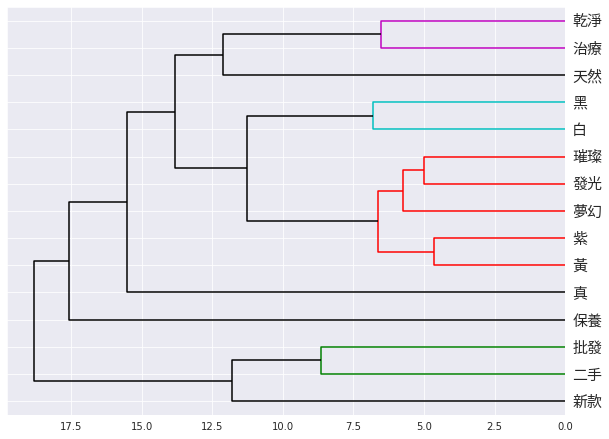

In [18]:
ax

# Bonus - Exercise 2 (+20%)

利用你的word2vec model，請訓練一個簡易的文本分類器。

- document embedding請直接平均文本中所有詞彙的詞向量(e.g.「秋天 快 到 了」直接平均4個詞的詞向量)
- 平均詞向量時，不在word2vec vocabulary裡的詞彙會引發OOV(out of vocabulary)的問題
- 有需要的話可以利用`chinese_stopwords.txt`去除停用詞
- 文本的類別在`ig5000.csv`的'label'欄位中(0=日常;1=廣告)
- 訓練方面，你可以隨意跑一些你喜歡的machine learning models (logistic regression, SVM, random forest,... deep learning除外)
- cross validation和hyperparameters tuning有空再做就好

最後你的output至少需要包含:
1. 文本的document-embeddings matrix (如下面corpus) (10%)
2. 簡述你如何解決計算document embedding時的OOV問題 (5%)
3. 你所試過的所有model和他們的test set accuracy (2.5%)
4. 表現最好的model的confusion matrix (2.5%)


In [ ]:
corpus

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,label
0,0.192990,-0.353105,-0.637730,0.286617,-0.227017,0.077776,-0.032824,0.015190,0.047843,-0.431044,-0.390724,-0.520349,0.102561,0.403420,-0.184293,-0.467724,-0.071131,-0.017697,0.279205,0.122739,0.079576,0.136973,0.144643,0.154536,0.192177,0.168489,0.259246,0.513220,0.524032,-0.391845,-0.322380,0.202511,0.227644,0.257050,0.095206,-0.050498,-0.029248,0.471188,0.032445,0.311016,...,-0.685516,-0.833418,0.533539,0.625854,0.616354,0.068118,-0.485060,-0.166710,-0.539041,-0.431813,-0.129563,-0.498144,-0.030738,-0.052177,0.241385,0.332864,-0.301577,0.031263,0.100970,-0.681104,0.157739,0.671826,0.154743,-0.941852,0.204680,0.032601,-0.336768,0.090635,0.228385,-0.287937,-0.591082,-0.308081,0.292203,0.083782,-0.557006,0.170762,-0.256684,0.287984,-0.342404,1.0
1,0.264886,0.318199,-0.474538,0.335873,-0.143216,-0.397015,0.117768,-0.073116,0.348682,0.123228,-0.303682,0.048323,-0.008648,-0.166442,0.230317,-0.143658,0.074512,-0.040029,-0.170591,-0.269050,0.204180,-0.284275,-0.254155,-0.192583,0.216075,0.321667,-0.017492,0.160492,0.452400,-0.427920,-0.088156,0.068886,-0.083137,0.221975,0.294456,-0.078048,0.013424,0.145106,-0.186925,0.008010,...,0.413322,-0.081376,0.059372,-0.384312,0.293054,-0.031519,-0.499182,-0.244810,0.703364,-0.220377,-0.358403,-0.212774,0.160210,-0.044254,0.170393,-0.308079,-0.167037,0.089810,-0.219749,-0.109353,-0.498963,-0.268336,0.045181,0.278844,-0.091885,-0.193576,0.040888,-0.592508,0.472210,0.086054,-0.177830,-0.292689,-0.048937,-0.284275,-0.192458,0.331729,-0.091718,0.295150,-0.405185,0.0
2,0.050494,0.062182,-0.277187,-0.037470,0.011746,-0.018096,-0.113610,-0.346261,-0.225315,-0.123444,-0.238500,0.051254,-0.281854,0.298280,0.214091,0.235831,0.280631,0.613712,0.274339,-0.200207,-0.086044,0.058969,0.288521,0.031395,0.191887,-0.272521,-0.179862,0.494307,0.176095,-0.077885,-0.147707,-0.145491,-0.081667,-0.482991,0.077837,0.560626,0.384661,-0.282479,-0.033539,0.689921,...,-0.403042,-0.244582,0.262772,0.183647,0.415574,0.086232,0.088336,-0.308699,-0.139552,0.006906,0.472767,0.129564,-0.121243,0.155336,0.059595,0.276522,-0.077766,-0.336030,0.138249,0.105532,0.190450,0.700476,0.513728,-0.457449,-0.015086,-0.290784,-0.033469,0.317946,-0.034361,-0.102761,-0.311855,-0.098766,-0.318900,-0.059755,0.071741,0.149131,-0.449186,0.139157,-0.109704,1.0
3,-0.125321,-0.162557,-0.607689,0.413347,0.085071,0.184236,-0.597848,0.074942,-0.158228,-0.559513,-0.572874,0.033011,-0.019276,0.132118,-0.367655,0.035912,0.281070,0.058180,0.033551,0.415208,0.269905,-0.277114,0.486044,-0.045913,0.195630,0.421089,-0.223460,0.212908,-0.376909,-0.101684,0.135800,0.023265,0.204033,-0.379376,-0.166123,0.164982,0.350796,-0.081032,-0.184405,0.188835,...,-0.209044,-0.628159,-0.112250,0.121028,-0.348168,0.578702,-0.121041,-0.354798,-0.078562,0.735033,-0.057174,0.305519,0.011923,-0.022155,-0.003218,-0.143152,0.245151,-0.259741,-0.160441,-0.251625,0.197762,0.215590,0.270766,-0.505007,-0.226891,-0.278887,-0.526623,0.681426,0.182765,-0.379253,0.287262,-0.079482,0.110983,0.276450,-0.196118,0.203030,0.078921,0.453891,-0.391339,1.0
4,0.063185,0.210982,-0.243325,0.171137,-0.183788,0.050384,-0.005891,-0.078528,-0.108301,-0.260658,-0.282339,-0.120371,-0.160868,-0.381158,0.009456,-0.320967,-0.121900,0.004943,0.424031,-0.023435,0.048744,0.345041,0.144369,-0.023117,0.165915,0.020629,0.250530,0.150640,0.184260,-0.120242,0.065530,0.080538,0.174770,-0.196059,0.380747,0.571336,0.178606,0.028259,0.004773,0.261315,...,-0.382582,-0.440590,-0.233670,-0.095550,0.249910,0.213039,-0.419989,-0.446747,0.421223,0.171159,-0.179146,0.120573,0.240674,-0.209752,-0.047438,0.178060,-0.049442,-0.056826,0.083020,-0.236708,-0.068266,0.029531,-0.000593,-0.482190,-0.170958,0.295103,0.120015,-0.065796,0.158213,0.017817,-0.190959,-

In [ ]:
print("Naive Bayes:", gnb.score(X_test, y_test))
print("Logistic Regression:",lgr.score(X_test, y_test))
print("Random Forest:", rfc.score(X_test, y_test))

Naive Bayes: 0.5207226354941552
Logistic Regression: 0.4962805526036132
Random Forest: 0.5217853347502657


## 表現最好的model

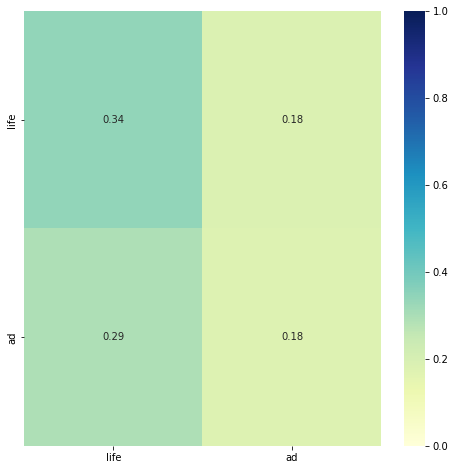

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf, xticklabels=labels, yticklabels=labels,annot=True, vmin=0, vmax=1, cmap="YlGnBu")